## CS/ECE/ISyE 524 - Fall 2023 - HW 10 - Starter Code

### Skylar Hou

### 1. Hexagon construction

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:       88
Number of nonzeros in Lagrangian Hessian.............:      144

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:       25
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       21

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.5267500e-02 9.56e-01 1.11e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

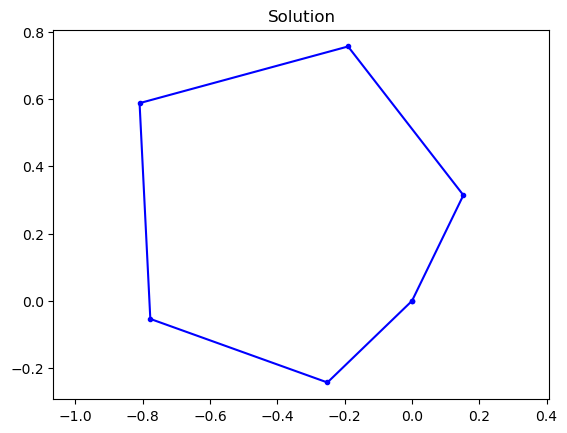

In [5]:
# Question 1 starter

using Random, JuMP, Ipopt

m = Model(Ipopt.Optimizer)

# locations of the six vertices.
@variable(m, x[1:6])
@variable(m, y[1:6])

# your code here
n = 6

@constraint(m, x[1] == 0)
@constraint(m, y[1] == 0)

@NLobjective(m, Max, 0.5*sum( x[i]*y[i+1]-y[i]*x[i+1] for i=2:n-1))

# add ordering constraint to the vertices
for i = 2:n-1
    @NLconstraint(m, x[i]*y[i+1]-y[i]*x[i+1] >= 0 )
end

for i = 1:n
    for j = i:n
        @NLconstraint(m, (x[i]-x[j])^2 + (y[i]-y[j])^2 <= 1)
    end
end

Random.seed!(2367877)

set_start_value.(x,rand(n))
set_start_value.(y,rand(n))

# setvalue(x,rand(n))
# setvalue(y,rand(n))

optimize!(m)

# print optimal objective
println("area=",objective_value(m))
    
# plot solution from optimal values of (x,y) coordinates.
using PyPlot
X = [value.(x); 0]
Y = [value.(y); 0]
axis("equal")
plot(X,Y,"b.-")
title("Solution");



### 2. Fertilizer influence model

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  8.2578724e+05 0.00e+00 1.00e+02  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

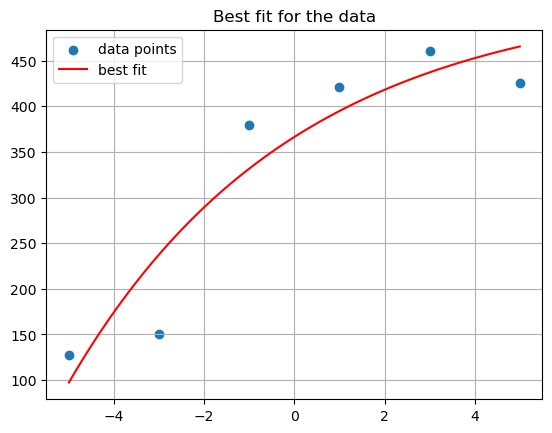

In [12]:
# Question 2 starter


using JuMP, Ipopt

x =     [ -5  -3  -1   1   3   5]
ymeas = [127 151 379 421 460 426]
N = length(x)


# your code here
m = Model(Ipopt.Optimizer)

@variable(m, k[1:3])
expected_k = [500 -200 -1]
set_start_value.(k, expected_k)

@NLexpression(m, y[i in 1:N], k[1] + k[2] * exp(k[3] * x[i]))

@NLobjective(m, Min, sum((y[i] - ymeas[i])^2 for i in 1:N))

optimize!(m)
println(value.(k))
    
# Plot the data and the best-fit curve
using PyPlot

xv = range(-5, stop=5, length=100)
# plot some silly curve (replace this with the real thing)
yv = value.(k)[1] .+ value.(k)[2] .* exp.(value.(k)[3] .* xv)

scatter(x, ymeas, label="data points")
plot(xv, yv, "r-", label="best fit")
grid()
legend(loc="best"); title("Best fit for the data")

;